# Guía 2: Gráficos en R parte 1
Computación 2, IES.
Profesor: Eduardo Jorquera, eduardo.jorquera@postgrado.uv.cl

## Introducción a gráficos
### Gráficos de línea
Primero vamos a producir un gráfico muy simple, usando los valores en el vector de autos (cars):

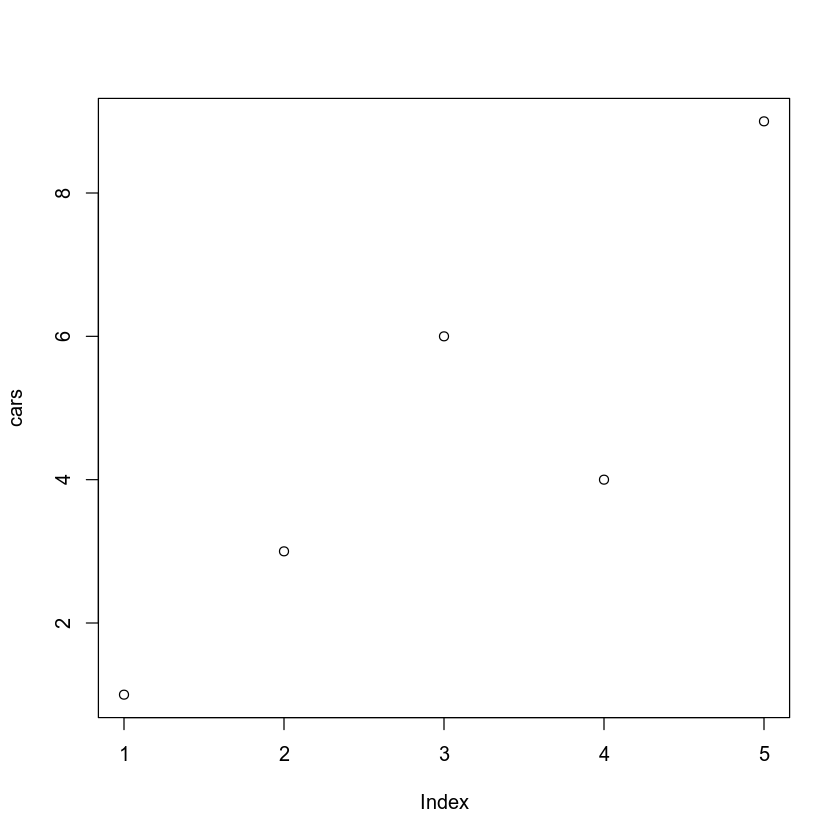

In [2]:
# Define el vector de autos con 5 valores
cars <- c(1, 3, 6, 4, 9)

# Grafica el vector con todas las opciones por defecto
plot(cars)

Ahora agreguemos un pequeño retoque, una línea para conectar los puntos y usar algún otro color

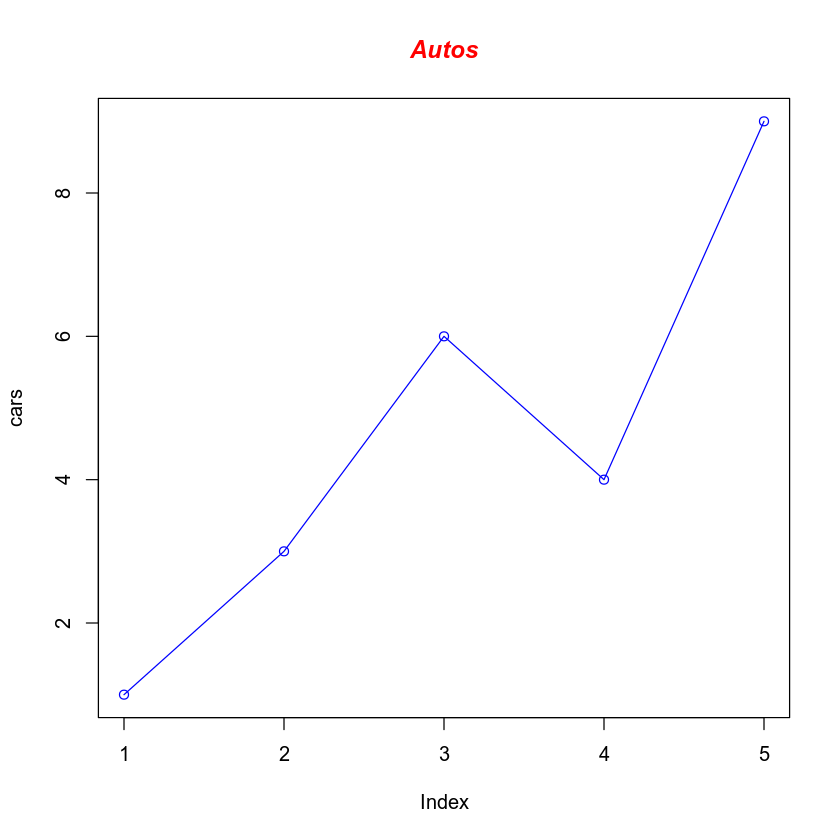

In [3]:
# Define el vector de autos con 5 valores
cars <- c(1, 3, 6, 4, 9)

# Grafica el vector con todas las opciones por defecto
plot(cars, type="o", col="blue")

# Crea un título con una fuente ennegrecida, itálica y roja
title(main="Autos", col.main="red", font.main=4)

Ahora agreguemos una línea roja para trucks (otro tipo de auto) y especifiquemos el rango del eje y directamente, de tal forma que sea lo suficientemente largo para que se ajuste a los datos de truck:

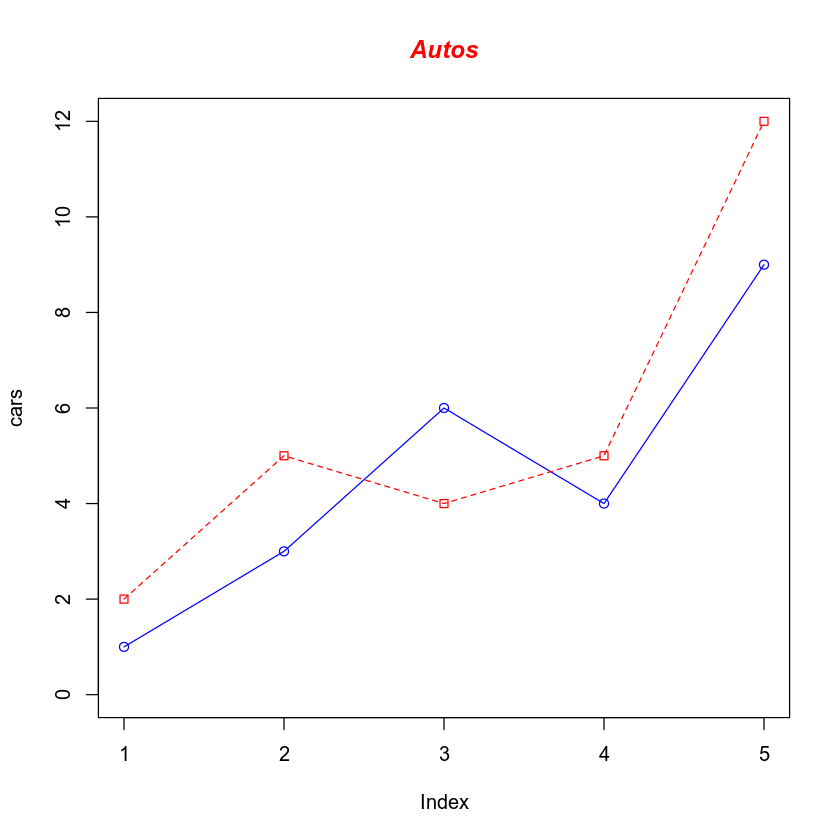

In [8]:
# Definimos 2 vectores
cars <- c(1, 3, 6, 4, 9)
trucks <- c(2, 5, 4, 5, 12)

# Graficamos los autos usando un eje y cuyo rando es de 0 a 12
plot(cars, type="o", col="blue", ylim=c(0,12))

# Graficamos trucks con una línea roja punteada y puntos cuadrados
lines(trucks, type="o", pch=22, lty=2, col="red")

# Crea un título con una fuente ennegrecida, itálica y roja
title(main="Autos", col.main="red", font.main=4)

Ahora cambiemos las etiquetas de los ejes para calzar los datos con una leyenda. También los valores del eje y se fijarán usando la función max, entonces cualquier cambio a nuestros datos afectarán automaticamente el eje y del gráfico.

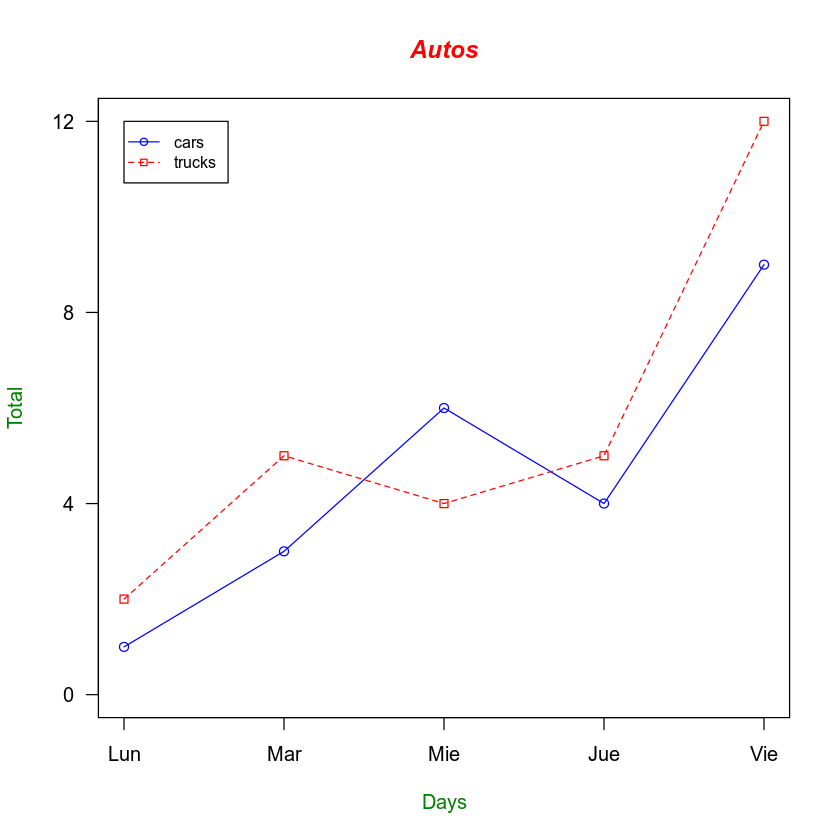

In [16]:
# Definimos 2 vectores
cars <- c(1, 3, 6, 4, 9)
trucks <- c(2, 5, 4, 5, 12)

# Calculamos el rango de 0 al máximo de los valores de cars y trucks:
g_range <- range(0, cars, trucks)

# Graficamos los autos usando el eje y que tiene los rangos 
# anteriormente descritos.
plot(cars, type="o", col="blue", ylim=g_range, 
   axes=FALSE, ann=FALSE)

# Hacer un eje x usando etiquetas Lun-Vie
axis(1, at=1:5, lab=c("Lun","Mar","Mie","Jue","Vie"))

# Hacer eje y con etiquetas horizontales que muestran ticks cada 
# 4 marcas. Note que 4*0:g_range[2] es equivalente a c(0,4,8,12).
axis(2, las=1, at=4*0:g_range[2])

# Crea una caja alrededor del gráfico
box()

# Grafica trucks con parámetros gráficos
lines(trucks, type="o", pch=22, lty=2, col="red")

# Crea un título como el anterior
title(main="Autos", col.main="red", font.main=4)

# Los ejes x e y con fuente verde en negrita 
title(xlab="Days", col.lab=rgb(0,0.5,0))
title(ylab="Total", col.lab=rgb(0,0.5,0))

# Crea una leyenda en (1, g_range[2]) que es ligeramente menor 
# (cex) y usa los mismos colores y puntos usados por el gráfico
legend(1, g_range[2], c("cars","trucks"), cex=0.8, 
   col=c("blue","red"), pch=21:22, lty=1:2)

### Gráficos de barra

Empecemos con uno simple:

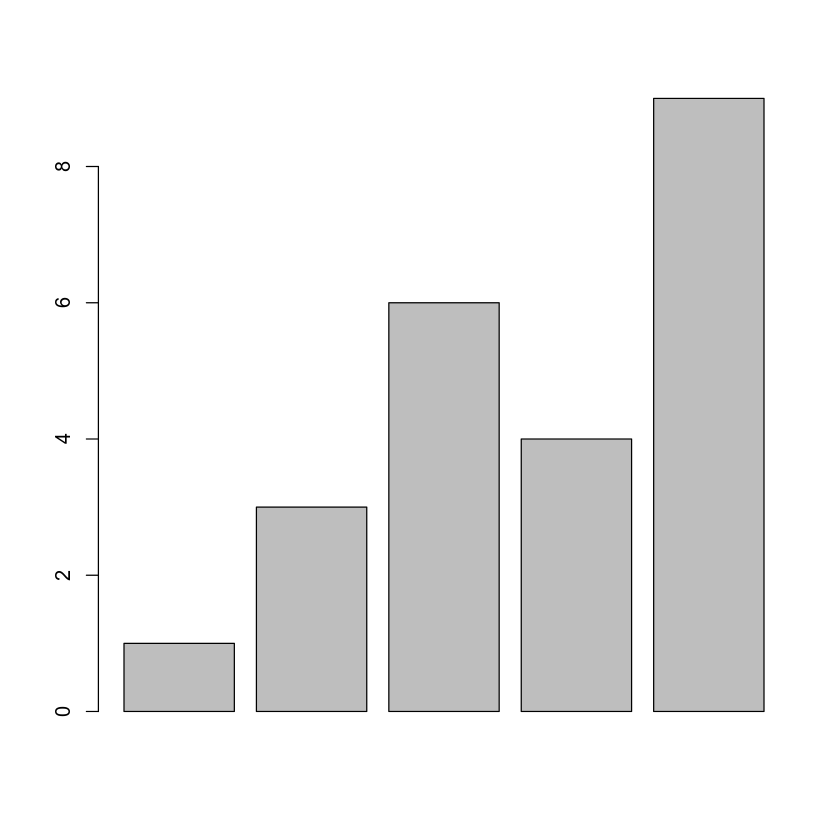

In [17]:
# Definimos cars con 5 valores
cars <- c(1, 3, 6, 4, 9)

# grafico de cars
barplot(cars)

Ahora metamos los datos anteriormente guardados en un data frame:

In [18]:
autos_data=data.frame(cars,trucks)

Ahora usemos el data frame para graficar los datos

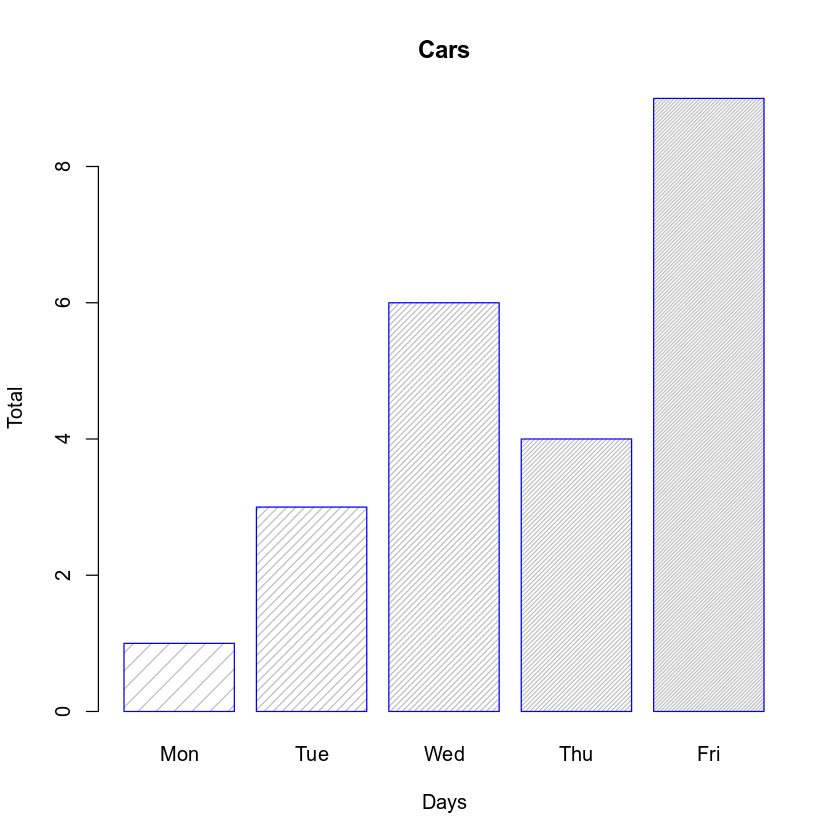

In [21]:
# Grafiquemos los autos con bordes azules
# bordes y líneas diagonales en las barras
barplot(autos_data$cars, main="Cars", xlab="Days",  
   ylab="Total", names.arg=c("Lun","Mar","Mie","Jue","Vie"), 
   border="blue", density=c(10,20,30,40,50))


Ahora grafiquemos el número total de autos por día, usando algún color y mostrando la leyenda:

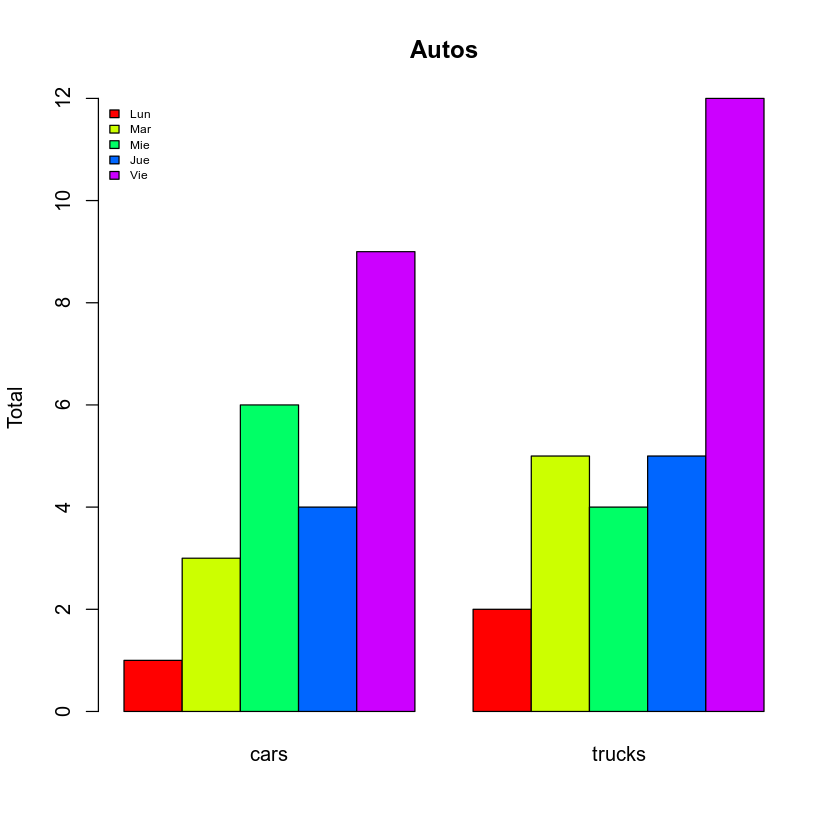

In [24]:
# Grafica los autos conbarras adyacentes usando colores del arcoiris
barplot(as.matrix(autos_data), main="Autos", ylab= "Total",
   beside=TRUE, col=rainbow(5))

# Ubica la leyenda en la esquina superior izquierda sin cuadro
# usando los colores del arcoiris
legend("topleft", c("Lun","Mar","Mie","Jue","Vie"), cex=0.6, 
   bty="n", fill=rainbow(5));

Grafiquemos el número total de autos por día usando un gráfico de barras apilado y ubicando la leyenda fuera del área del gráfico:

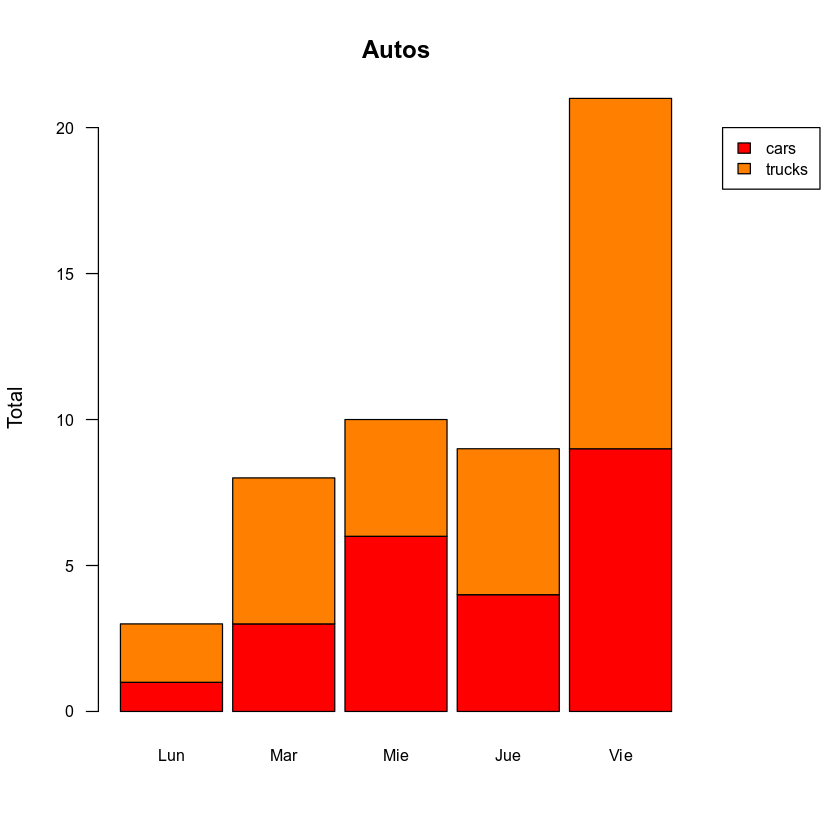

In [39]:
# Expande el lado derecho del espacio del gráfico para dejar 
# lugar a la leyenda
par(xpd=T, mar=par()$mar+c(0,0,0,4))

# Grafica autos (transponiendo la matriz) usando colores de calor,  
# pone el 10% del espacio entre cada barra, y hace etiquetas
# más pequeñas con eje horizontal y etiquetas en el eje y
barplot(t(autos_data), main="Autos", ylab="Total", 
   col=heat.colors(3), space=0.1, cex.axis=0.8, las=1,
   names.arg=c("Lun","Mar","Mie","Jue","Vie"), cex=0.8) 
   
# Ubicación de la leyenda
legend(6, 20, names(autos_data), cex=0.8, fill=heat.colors(3));
   
# Restaura el espaciado gráfico
par(mar=c(5, 4, 4, 2) + 0.1)